In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr

In [12]:
df_rg = pd.read_csv('data/regridded_3x3_efp.csv', index_col=0)
df_non_rg = pd.read_csv('data/non-regridded_efp.csv', index_col=0)

df = pd.merge(df_rg, df_non_rg, on='model', suffixes=('_rg', '_non-rg'))
df

,model,efp_nh_rg,efp_sh_rg,efp_nh_non-rg,efp_sh_non-rg
0,CESM1-WACCM-SC,0.1421,0.0303,0.1297,0.0295
1,CESM2,0.4132,0.3714,0.3693,0.3419
2,CNRM-CM6-1,0.2771,0.2492,0.2421,0.2082
3,CanESM5,0.4446,0.4808,0.4256,0.4618
4,E3SMv1,0.0589,0.0588,0.0543,0.0542
5,EC-EARTH3,0.3467,0.3621,0.2945,0.3135
6,ECHAM6.3,0.0144,0.0104,0.0139,0.0103
7,FGOALS-f3-L,0.2642,0.1512,0.2354,0.1274
8,HadGEM3-GC31-LL,0.3168,0.3412,0.2730,0.2951
9,HadGEM3-GC31-MM,0.3757,0.3621,0.3137,0.3002


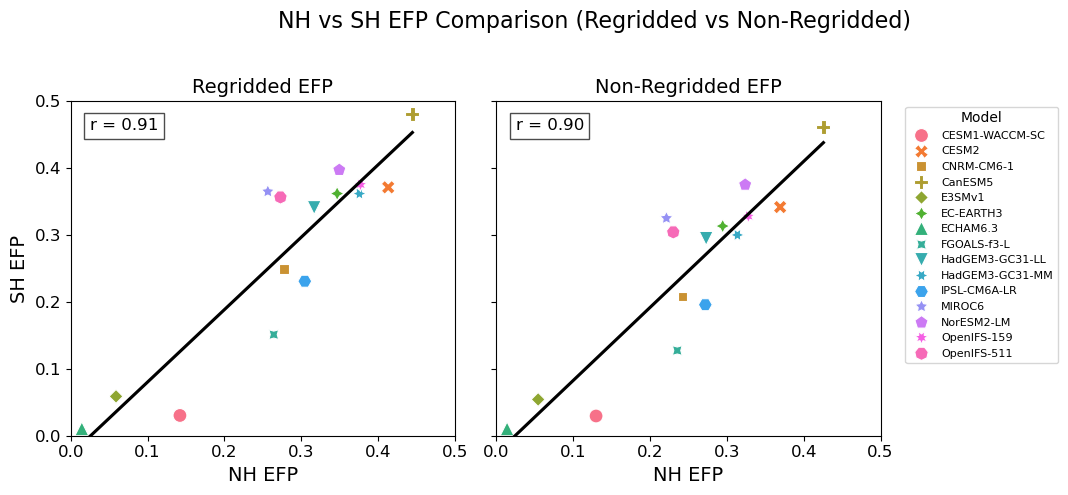

In [13]:
# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# Helper function to compute and add Pearson correlation
def add_correlation(ax, x, y):
    corr, _ = pearsonr(x, y)
    ax.text(0.05, 0.95, f"r = {corr:.2f}", transform=ax.transAxes,
            fontsize=12, verticalalignment="top",
            bbox=dict(facecolor="white", alpha=0.7))

# Plot 1: Regridded NH vs SH
sns.scatterplot(
    x=df["efp_nh_rg"],
    y=df["efp_sh_rg"],
    hue=df["model"],
    style=df["model"],
    s=100,
    ax=axes[0]
)
sns.regplot(
    x=df["efp_nh_rg"],
    y=df["efp_sh_rg"],
    scatter=False,
    ax=axes[0],
    color="black",
    ci=None
)
axes[0].set_title("Regridded EFP", fontsize=14)
axes[0].set_xlabel("NH EFP", fontsize=14)
axes[0].set_ylabel("SH EFP", fontsize=14)
axes[0].set_xlim(0, 0.5)
axes[0].set_ylim(0, 0.5)
axes[0].tick_params(labelsize=12)
axes[0].get_legend().remove()
add_correlation(axes[0], df["efp_nh_rg"], df["efp_sh_rg"])

# Plot 2: Non-regridded NH vs SH
sns.scatterplot(
    x=df["efp_nh_non-rg"],
    y=df["efp_sh_non-rg"],
    hue=df["model"],
    style=df["model"],
    s=100,
    ax=axes[1]
)
sns.regplot(
    x=df["efp_nh_non-rg"],
    y=df["efp_sh_non-rg"],
    scatter=False,
    ax=axes[1],
    color="black",
    ci=None
)
axes[1].set_title("Non-Regridded EFP", fontsize=14)
axes[1].set_xlabel("NH EFP", fontsize=14)
axes[1].set_ylabel("", fontsize=14)
axes[1].set_xlim(0, 0.5)
axes[1].set_ylim(0, 0.5)
axes[1].tick_params(labelsize=12)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8, title="Model", title_fontsize=10)
add_correlation(axes[1], df["efp_nh_non-rg"], df["efp_sh_non-rg"])

# Suptitle and layout
fig.suptitle("NH vs SH EFP Comparison (Regridded vs Non-Regridded)", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()


In [14]:
# remove some models
df2 = df[~df["model"].isin(["E3SMv1", "ECHAM6.3"])]
df2

,model,efp_nh_rg,efp_sh_rg,efp_nh_non-rg,efp_sh_non-rg
0,CESM1-WACCM-SC,0.1421,0.0303,0.1297,0.0295
1,CESM2,0.4132,0.3714,0.3693,0.3419
2,CNRM-CM6-1,0.2771,0.2492,0.2421,0.2082
3,CanESM5,0.4446,0.4808,0.4256,0.4618
5,EC-EARTH3,0.3467,0.3621,0.2945,0.3135
7,FGOALS-f3-L,0.2642,0.1512,0.2354,0.1274
8,HadGEM3-GC31-LL,0.3168,0.3412,0.2730,0.2951
9,HadGEM3-GC31-MM,0.3757,0.3621,0.3137,0.3002
10,IPSL-CM6A-LR,0.3046,0.2310,0.2719,0.1959
11,MIROC6,0.2565,0.3651,0.2213,0.3253


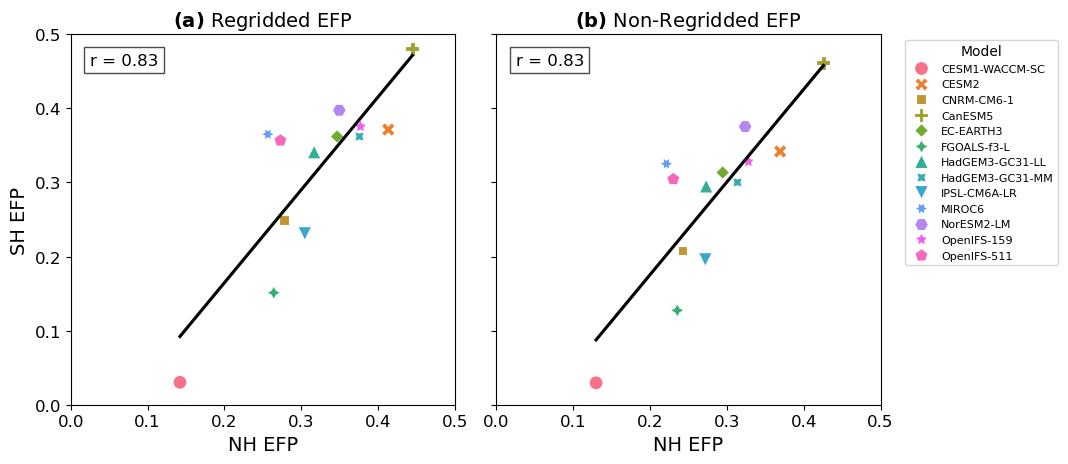

In [15]:
# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# Helper function to compute and add Pearson correlation
def add_correlation(ax, x, y):
    corr, _ = pearsonr(x, y)
    ax.text(0.05, 0.95, f"r = {corr:.2f}", transform=ax.transAxes,
            fontsize=12, verticalalignment="top",
            bbox=dict(facecolor="white", alpha=0.7))

# Plot 1: Regridded NH vs SH
sns.scatterplot(
    x=df2["efp_nh_rg"],
    y=df2["efp_sh_rg"],
    hue=df2["model"],
    style=df2["model"],
    s=100,
    ax=axes[0]
)
sns.regplot(
    x=df2["efp_nh_rg"],
    y=df2["efp_sh_rg"],
    scatter=False,
    ax=axes[0],
    color="black",
    ci=None
)
axes[0].set_title("$\\bf{(a)}$ Regridded EFP", fontsize=14)
axes[0].set_xlabel("NH EFP", fontsize=14)
axes[0].set_ylabel("SH EFP", fontsize=14)
axes[0].set_xlim(0, 0.5)
axes[0].set_ylim(0, 0.5)
axes[0].tick_params(labelsize=12)
axes[0].get_legend().remove()
add_correlation(axes[0], df2["efp_nh_rg"], df2["efp_sh_rg"])

# Plot 2: Non-regridded NH vs SH
sns.scatterplot(
    x=df2["efp_nh_non-rg"],
    y=df2["efp_sh_non-rg"],
    hue=df2["model"],
    style=df2["model"],
    s=100,
    ax=axes[1]
)
sns.regplot(
    x=df2["efp_nh_non-rg"],
    y=df2["efp_sh_non-rg"],
    scatter=False,
    ax=axes[1],
    color="black",
    ci=None
)
axes[1].set_title("$\\bf{(b)}$ Non-Regridded EFP", fontsize=14)
axes[1].set_xlabel("NH EFP", fontsize=14)
axes[1].set_ylabel("", fontsize=14)
axes[1].set_xlim(0, 0.5)
axes[1].set_ylim(0, 0.5)
axes[1].tick_params(labelsize=12)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8, title="Model", title_fontsize=10)
add_correlation(axes[1], df2["efp_nh_non-rg"], df2["efp_sh_non-rg"])

# Suptitle and layout
# fig.suptitle("NH vs SH EFP Comparison (Regridded vs Non-Regridded)", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()


# Fabricate AWI (ECHAM) data

In [21]:
# df['model'] = df['model'].replace({'ECHAM6.3': 'AWI-CM-1-1-MR'})
# df.loc[df['model'] == 'AWI-CM-1-1-MR', ['efp_nh', 'efp_sh']] = [0.3724, 0.4354]
# df.to_csv('data/non-regridded_efp_AWI-fabricated.csv')

df = pd.read_csv('data/non-regridded_efp_AWI-fabricated.csv', index_col=0)
df

,model,efp_nh,efp_sh
0,CESM1-WACCM-SC,0.1297,0.0295
1,CESM2,0.3693,0.3419
2,CNRM-CM6-1,0.2421,0.2082
3,CanESM5,0.4256,0.4618
4,E3SMv1,0.0543,0.0542
5,EC-EARTH3,0.2945,0.3135
6,AWI-CM-1-1-MR,0.3724,0.4354
7,FGOALS-f3-L,0.2354,0.1274
8,HadGEM3-GC31-LL,0.2730,0.2951
9,HadGEM3-GC31-MM,0.3137,0.3002


,model,efp_nh,efp_sh
0,CESM1-WACCM-SC,0.1297,0.0295
1,CESM2,0.3693,0.3419
2,CNRM-CM6-1,0.2421,0.2082
3,CanESM5,0.4256,0.4618
4,E3SMv1,0.0543,0.0542
5,EC-EARTH3,0.2945,0.3135
6,AWI-CM-1-1-MR,0.3724,0.4354
7,FGOALS-f3-L,0.2354,0.1274
8,HadGEM3-GC31-LL,0.2730,0.2951
9,HadGEM3-GC31-MM,0.3137,0.3002
